# (Car Price Analysis & Prediction)
## by (Mohamed Hamdy)

## Preliminary Wrangling

> This data set includes information about car prices from 2003 to 2018 with many features relevant to the selling price like kms driven and fuel type the car type, we have around six categorical features in this dataset and thre numerical features, we are going to analyse this dataset getting isnsights about the main factors affecting car prices and later we are going to predict the car price by machine learning techniques

#### Importing desired libraries

In [178]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

#### Loading the Data

In [179]:
# Loadong the data, investigating first 5 rows of the dataset
df = pd.read_csv('E://z/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [180]:
# Defining the shape of dataset 
df.shape

(301, 9)

In [181]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**The dataset is from 2003 to 2018**

In [182]:
# Checking if there any missing values in the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


__Obviously there is no missing values in this dataset__

In [78]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [79]:
df.isna().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [183]:
# Checking if there any duplicated rows 
df.duplicated().sum()

2

In [81]:
df['Kms_Driven'].describe()

count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Kms_Driven, dtype: float64

In [82]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [83]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [84]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [85]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [86]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [87]:
ordered=df['Car_Name'].value_counts()[:20].index

**We have 98 car brand in the dataset with most common of 5 cars (City,Corolla,Verna,Fortuner,Brio)**

__Investigating the relation between car brand and year__

## Univariate Exploration

> In this section, we will investigate distributions of individual variables. to check 
 unusual points or outliers

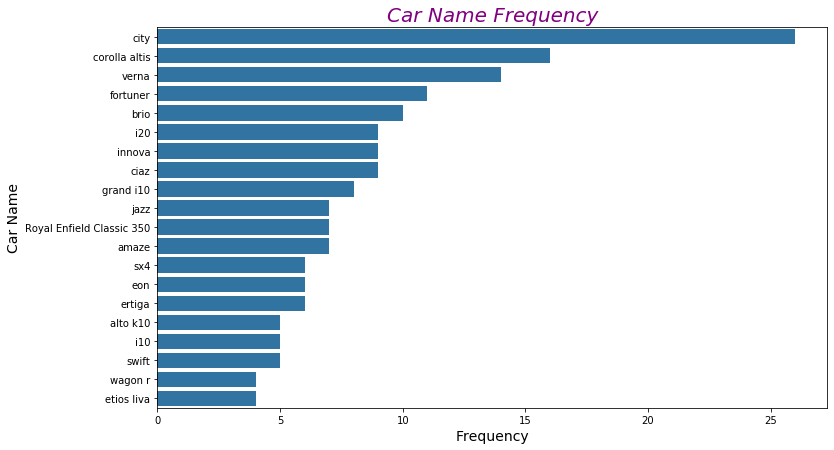

In [184]:
# Checking the frequency of the most common car types in the dataset
# creating based color variable to use in the upcoming plots
based_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.countplot(data=df,y='Car_Name',order = ordered,color=based_color);
plt.ylabel('Car Name',fontsize=14)
plt.xlabel('Frequency',fontsize=14);
plt.title('Car Name Frequency',fontsize=20, fontweight=0, color='purple', style='italic');


##### The most common car brand names in this dataset are City, Corolla altis and Verna

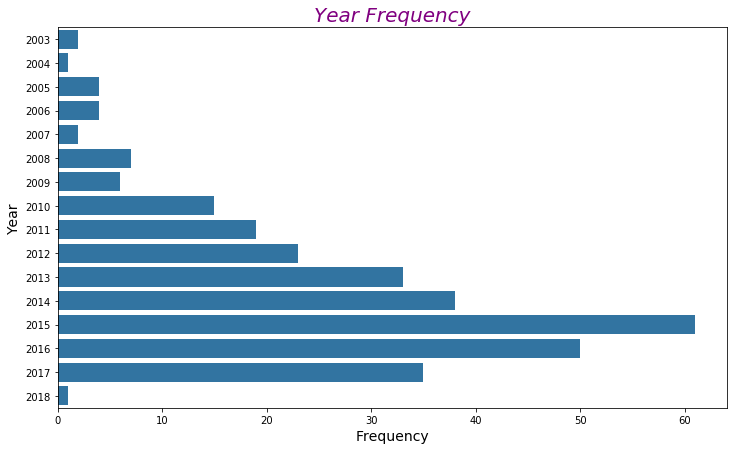

In [185]:
# The most common car model year represented in this dataaset 
based_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.countplot(data=df,y='Year',color=based_color);
plt.ylabel('Year',fontsize=14)
plt.xlabel('Frequency',fontsize=14);
plt.title('Year Frequency',fontsize=20, fontweight=0, color='purple', style='italic');

##### We can see that 2015 is the most common car model year represented in the dataset follopwed by 2016 

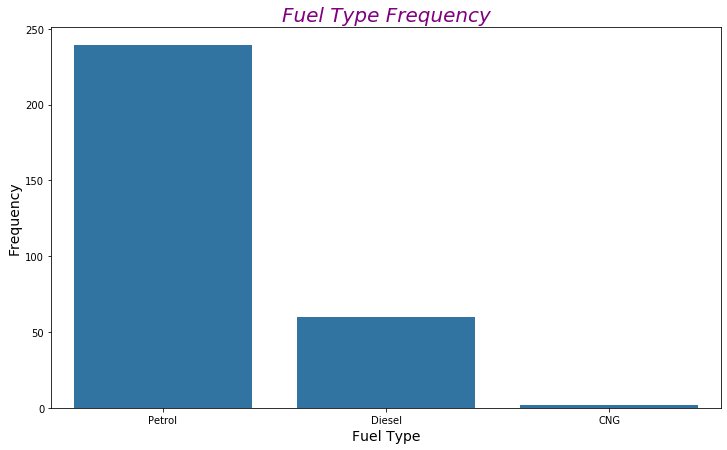

In [186]:
# Fuel type frequency by countplot 
based_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.countplot(data=df,x='Fuel_Type',color=based_color);
plt.xlabel('Fuel Type',fontsize=14)
plt.ylabel('Frequency',fontsize=14);
plt.title('Fuel Type Frequency',fontsize=20, fontweight=0, color='purple', style='italic');

#####  Petrol car fuel are the most car types in the dataset followed by Diesel and CNG 

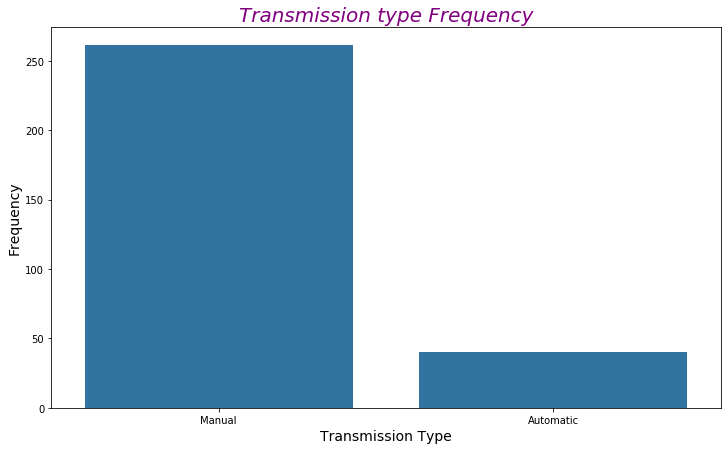

In [187]:
# Transmission type frequency 
based_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.countplot(data=df,x='Transmission',color=based_color);
plt.xlabel('Transmission Type',fontsize=14)
plt.ylabel('Frequency',fontsize=14);
plt.title('Transmission type Frequency',fontsize=20, fontweight=0, color='purple', style='italic');

##### Manual transmission type are the most common car type in the dataset  around 250 manual car and the rest are automatic

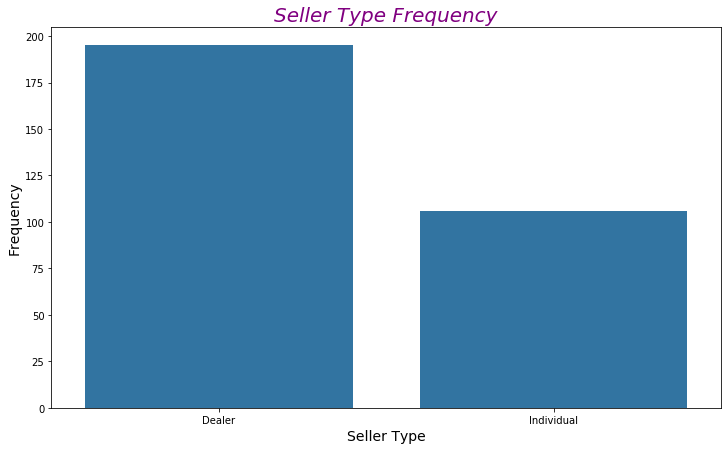

In [188]:
# Frequency of seller types involved in the dataset
based_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.countplot(data=df,x='Seller_Type',color=based_color);
plt.xlabel('Seller Type',fontsize=14)
plt.ylabel('Frequency',fontsize=14);
plt.title('Seller Type Frequency',fontsize=20, fontweight=0, color='purple', style='italic');

##### Obviuosly dealers are the dominant sellers in the dataset with count arount 200 and the rest are individual sellers

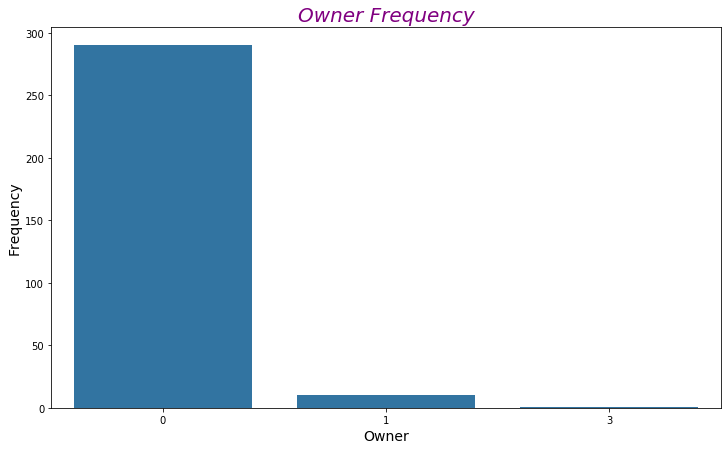

In [189]:
# Frequency of the owner degree
based_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.countplot(data=df,x='Owner',color=based_color);
plt.xlabel('Owner',fontsize=14)
plt.ylabel('Frequency',fontsize=14);
plt.title('Owner Frequency',fontsize=20, fontweight=0, color='purple', style='italic');

##### First car owner are the most dominant owner type 

## Bivariate Exploration

> In this section, we will investigate the relationship between two features variables.

In [93]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


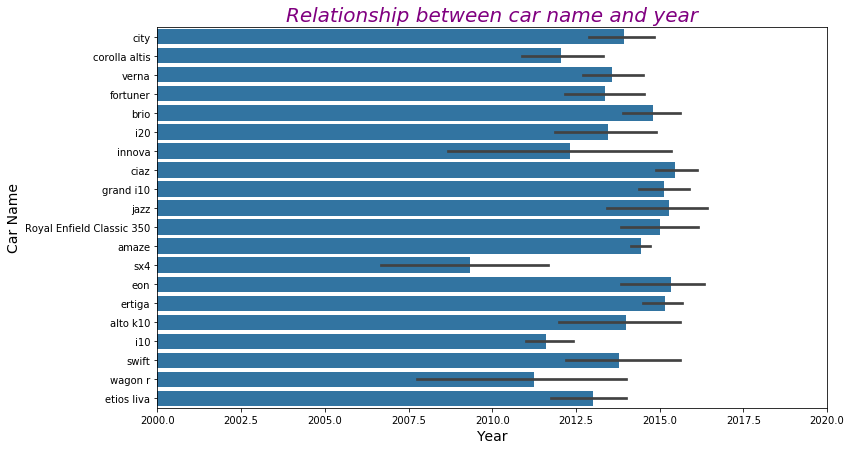

In [190]:
# Relationship between year and car brand name
based_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.barplot(data=df,x='Year',y='Car_Name',order = ordered,color=based_color);
plt.xlim((2000,2020))
plt.ylabel('Car Name',fontsize=14)
plt.xlabel('Year',fontsize=14);
plt.title('Relationship between car name and year',fontsize=20, fontweight=0, color='purple', style='italic');

##### As shown in this plot that most cars are near 2156 and 2016 as mentioned before in previous plot 

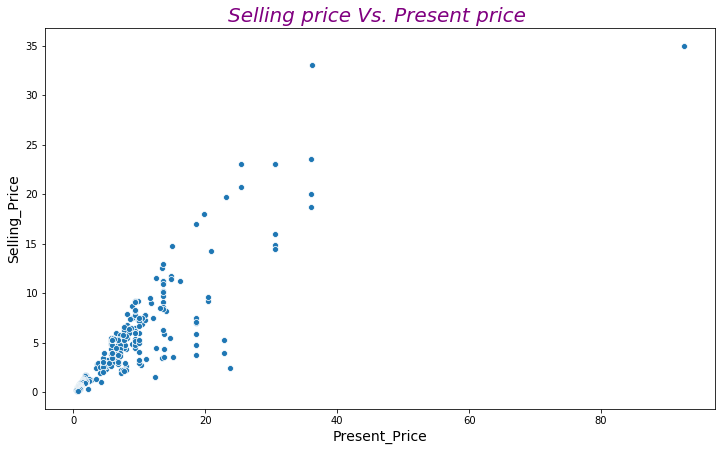

In [191]:
# Showing the trend between selling price and present price
based_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.scatterplot(data=df,x='Present_Price',y='Selling_Price',color=based_color);

plt.ylabel('Selling_Price',fontsize=14)
plt.xlabel('Present_Price',fontsize=14);
plt.title('Selling price Vs. Present price ',fontsize=20, fontweight=0, color='purple', style='italic');


##### There is strong positive relationship between present and selling price

In [97]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


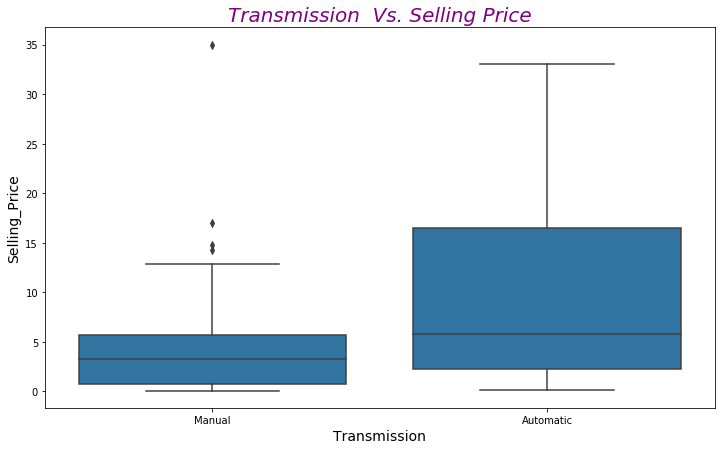

In [193]:
# Find the relationship between selling price and transmission type
based_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.boxplot(data=df,x='Transmission',y='Selling_Price',color=based_color);

plt.ylabel('Selling_Price',fontsize=14)
plt.xlabel('Transmission',fontsize=14);
plt.title('Transmission  Vs. Selling Price',fontsize=20, fontweight=0, color='purple', style='italic');

##### Automatic cars obviously are higher in price than manual cars

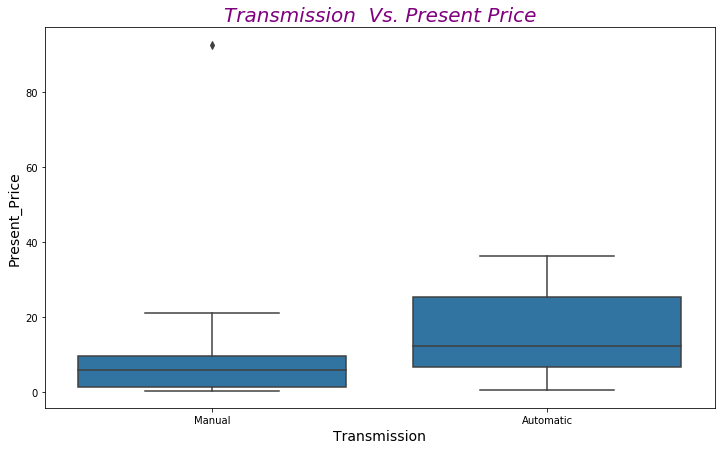

In [194]:
# present price versus transmission type
based_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.boxplot(data=df,x='Transmission',y='Present_Price',color=based_color);

plt.ylabel('Present_Price',fontsize=14)
plt.xlabel('Transmission',fontsize=14);
plt.title('Transmission  Vs. Present Price',fontsize=20, fontweight=0, color='purple', style='italic');

##### Since present and selling price asre having strog positive relationship so same asa selling price, automatic cars highre in price than manual

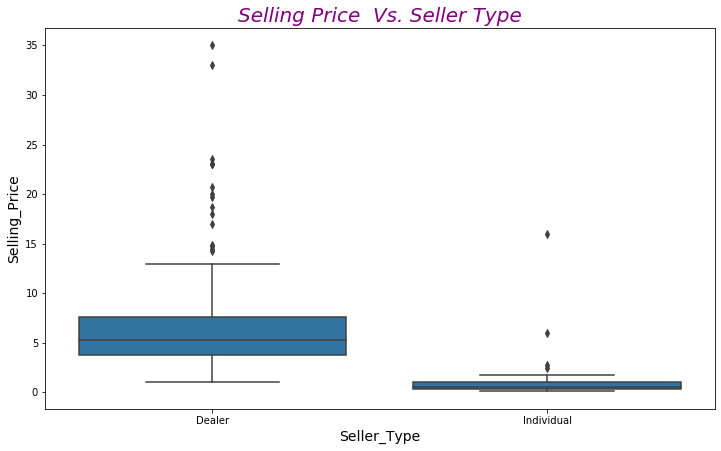

In [195]:
# Selling price and Seller type relationship 
based_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.boxplot(data=df,x='Seller_Type',y='Selling_Price',color=based_color);

plt.ylabel('Selling_Price',fontsize=14)
plt.xlabel('Seller_Type',fontsize=14);
plt.title('Selling Price  Vs. Seller Type',fontsize=20, fontweight=0, color='purple', style='italic');

##### When seller type are dealers the selling price is higher than when the seller is individual 

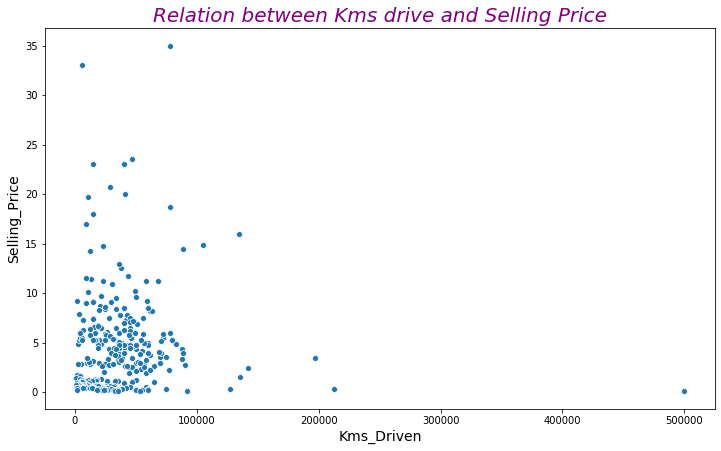

In [196]:
# Kms driven and selling price
based_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.scatterplot(data=df,x='Kms_Driven',y='Selling_Price',color=based_color);

plt.ylabel('Selling_Price',fontsize=14)
plt.xlabel('Kms_Driven',fontsize=14);
plt.title('Relation between Kms drive and Selling Price',fontsize=20, fontweight=0, color='purple', style='italic');

##### Obviously from this plot we can see most of the points with in the low values range are higher in price than large km's values 

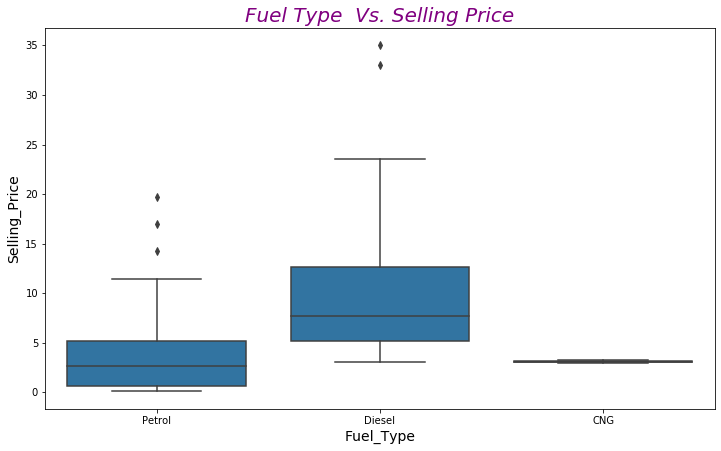

In [197]:
# price versus Fuel type
based_color=sb.color_palette()[0]
plt.figure(figsize=(12,7))
sb.boxplot(data=df,x='Fuel_Type',y='Selling_Price',color=based_color);

plt.ylabel('Selling_Price',fontsize=14)
plt.xlabel('Fuel_Type',fontsize=14);
plt.title('Fuel Type  Vs. Selling Price',fontsize=20, fontweight=0, color='purple', style='italic');

##### Diesel car types higher in price than petrol and CNG 

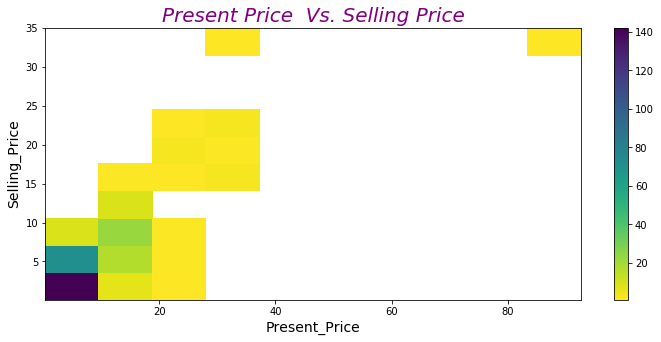

In [198]:
# 
plt.figure(figsize=(12,5))
based_color = sb.color_palette()[0]
plt.hist2d(data=df,x='Present_Price',y='Selling_Price',cmin= 0.5,cmap='viridis_r');
plt.colorbar();
plt.ylabel('Selling_Price',fontsize=14)
plt.xlabel('Present_Price',fontsize=14);
plt.title('Present Price  Vs. Selling Price',fontsize=20, fontweight=0, color='purple', style='italic');


##### Confirmation that present and selling price ave strong relationship 

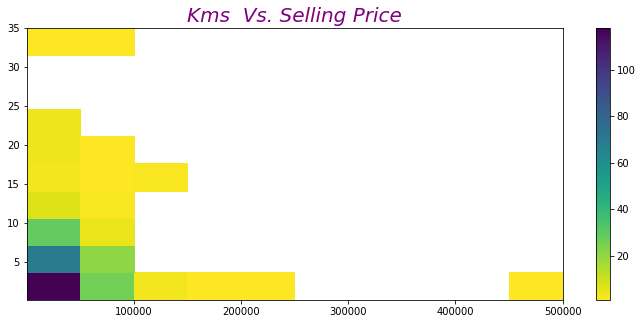

In [199]:
plt.figure(figsize=(12,5))
based_color = sb.color_palette()[0]
plt.hist2d(data=df,x='Kms_Driven',y='Selling_Price',cmin= 0.5,cmap='viridis_r');
plt.colorbar();
plt.title('Kms  Vs. Selling Price',fontsize=20, fontweight=0, color='purple', style='italic');


##### Confirmation that lower kilometers values the higher the price 

## Multivariate Exploration

> In this section, we will investigate the relationship between three features.

In [118]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


C:\Users\muham\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

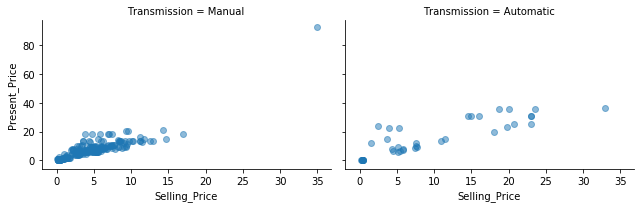

In [119]:
# Plotting facegrid scatter plots between transmission type, selling, and present price
plt.figure(figsize=(10,5))
g=sb.FacetGrid(data=df,col='Transmission',size=3,aspect=1.5)
g.map(plt.scatter,'Selling_Price','Present_Price',alpha=.5);



##### From this plot we can see that manual cars are dominant in this dataset and the automatic car type have a higher range of price 

C:\Users\muham\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

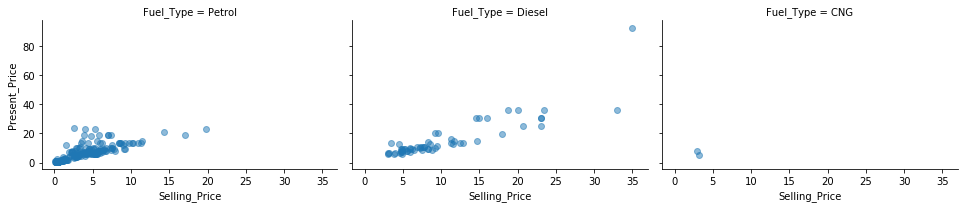

In [201]:
# Fuel type, present and selling price
plt.figure(figsize=(10,5))
g=sb.FacetGrid(data=df,col='Fuel_Type',size=3,aspect=1.5)
g.map(plt.scatter,'Selling_Price','Present_Price',alpha=.5);


##### We can see that Diesel fuel type is the most common type in this dataset, and diesel car type has the highest price range 

C:\Users\muham\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

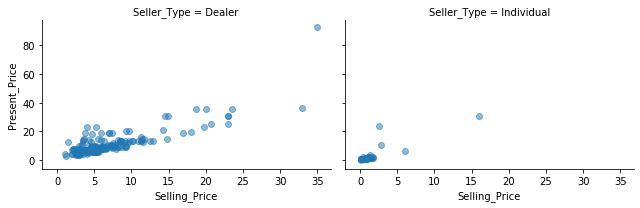

In [121]:
# Plotting seller type versus selling and present price 
plt.figure(figsize=(10,5))
g=sb.FacetGrid(data=df,col='Seller_Type',size=3,aspect=1.5)
g.map(plt.scatter,'Selling_Price','Present_Price',alpha=.5);

##### Dealers are the most dominant seller type in the dataset with higher price range than individual seller type

In [125]:
# Getting the most repeated cars in the dataset which are repeated more than 4 times
car_count = df['Car_Name'].value_counts()
threshold = 4
idx = np.sum(car_count > threshold)
common_cars = car_count.index[:idx]

In [127]:
df_sub = df.loc[df['Car_Name'].isin(common_cars)]

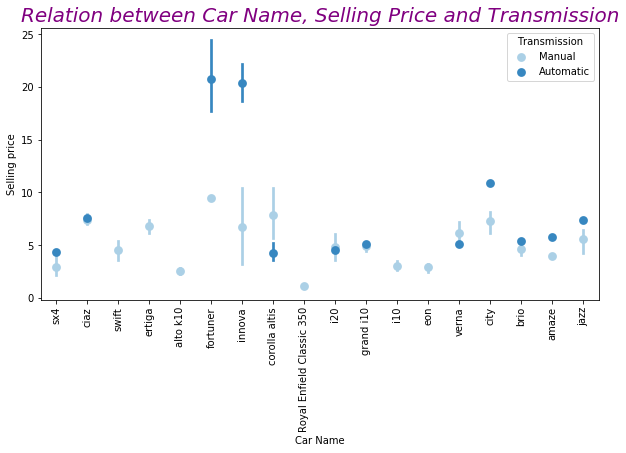

In [202]:
# Relationship between car name, transmission type and selling price 
plt.subplots(figsize=(10,5))
sb.pointplot(data =df_sub, x = 'Car_Name', y = 'Selling_Price',
           palette = 'Blues', linestyles = '',hue='Transmission')
plt.xticks(rotation = 90)
plt.xlabel('Car Name')
plt.ylabel('Selling price');
plt.title('Relation between Car Name, Selling Price and Transmission',fontsize=20, fontweight=0, color='purple', style='italic');

##### Fortuner and Innova car type are having the highes selling price among other cars and also are automatic

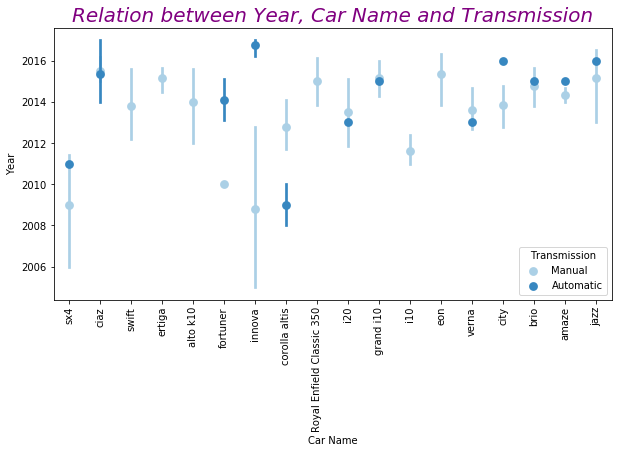

In [203]:
# Relationship between Year, car name and transmission

plt.subplots(figsize=(10,5))
sb.pointplot(data =df_sub, x = 'Car_Name', y = 'Year',
palette = 'Blues', linestyles = '',hue='Transmission')
plt.xticks(rotation = 90)
plt.xlabel('Car Name')
plt.ylabel('Year');
plt.title('Relation between Year, Car Name and Transmission',fontsize=20, fontweight=0, color='purple', style='italic');

##### Obviuosly this plot confirms that 2015 and 2016 contans the most cars in this dataset

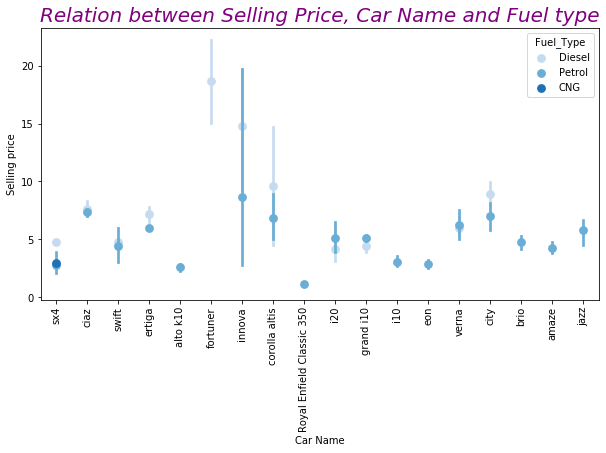

In [204]:
# Relationship car name, selling price and fuel type
plt.subplots(figsize=(10,5))
sb.pointplot(data =df_sub, x = 'Car_Name', y = 'Selling_Price',
palette = 'Blues', linestyles = '',hue='Fuel_Type')
plt.xticks(rotation = 90)
plt.xlabel('Car Name')
plt.ylabel('Selling price');
plt.title('Relation between Selling Price, Car Name and Fuel type',fontsize=20, fontweight=0, color='purple', style='italic');

##### This confirms that diesel cars have the highest price range among all other cars. and confirms that Innova and fortuner have the highest price range than other cars.

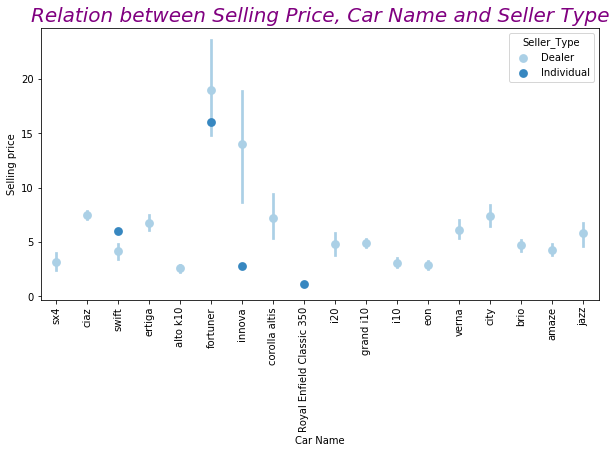

In [205]:
# Relationship between car name, selling price and seller type 
plt.subplots(figsize=(10,5))
sb.pointplot(data =df_sub, x = 'Car_Name', y = 'Selling_Price',
           palette = 'Blues', linestyles = '',hue='Seller_Type')
plt.xticks(rotation = 90)
plt.xlabel('Car Name')
plt.ylabel('Selling price');
plt.title('Relation between Selling Price, Car Name and Seller Type',fontsize=20, fontweight=0, color='purple', style='italic');

##### Dealer seller type are are the dominant type in this dataset, but dealer type has the highest seller price range, With confirmation that innova and fortuner are the highes selling price range.

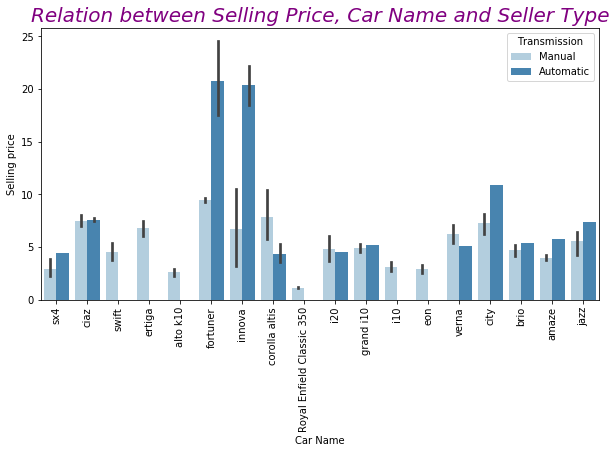

In [206]:
# Relationship between car name, selling price and Transformation
plt.subplots(figsize=(10,5))
sb.barplot(data =df_sub, x = 'Car_Name', y = 'Selling_Price',
           palette = 'Blues',hue='Transmission')
plt.xticks(rotation = 90)
plt.xlabel('Car Name')
plt.ylabel('Selling price');
plt.title('Relation between Selling Price, Car Name and Seller Type',fontsize=20, fontweight=0, color='purple', style='italic');

##### Confirmation that automatic cars have higher price range than manual cars with fortuner and innova with the highest price

In [136]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


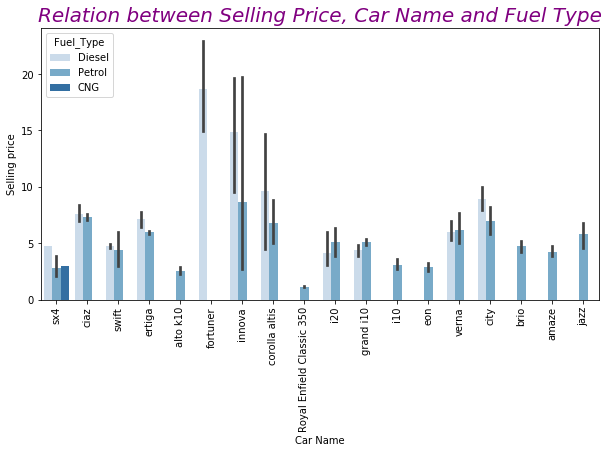

In [207]:
# Relationship between car name, fuel type and selling price
plt.subplots(figsize=(10,5))
sb.barplot(data =df_sub, x = 'Car_Name', y = 'Selling_Price',
           palette = 'Blues',hue='Fuel_Type')
plt.xticks(rotation = 90)
plt.xlabel('Car Name')
plt.ylabel('Selling price');
plt.title('Relation between Selling Price, Car Name and Fuel Type',fontsize=20, fontweight=0, color='purple', style='italic');

##### This plot shows that Diesel cars are having higher price range than petrol and CNG, especially fortuner and innova

C:\Users\muham\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

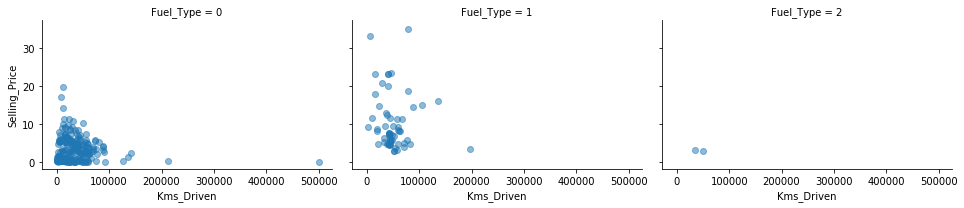

In [177]:
plt.figure(figsize=(10,5))
g=sb.FacetGrid(data=df,col='Fuel_Type',size=3,aspect=1.5)
g.map(plt.scatter,'Kms_Driven','Selling_Price',alpha=.5);

###### These scatter plots show that the lower the kms the higher the selling price, additionally petrol car type are the most dominant 

## Machine Learning Approach 

> In this section, we will predict the car prices with regression and lasso models 

In [145]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [147]:
# Converting categorical features into numerical features for training 
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [148]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#### Splitting the data to training and test data

In [149]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [150]:
# Splitting the data to training and test data 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.1,random_state=2)

**Regression model creartion**

In [152]:
lin_reg_model = LinearRegression()

In [153]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Training data prediction

In [154]:
training_data_prediction = lin_reg_model.predict(X_train)

In [156]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
error_score

0.87994516604937

##### Visulaize Actual and predicted prices 

Text(0, 0.5, 'Predicted Price')

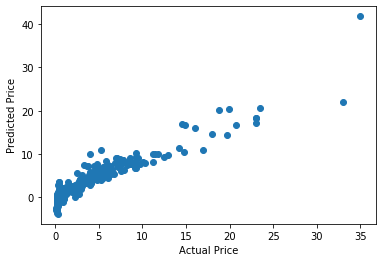

In [158]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

##### Checking the R square function for test data

In [160]:
test_data_prediction = lin_reg_model.predict(X_test)

In [161]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
error_score

0.8365766715025409

Text(0, 0.5, 'Predicted Price')

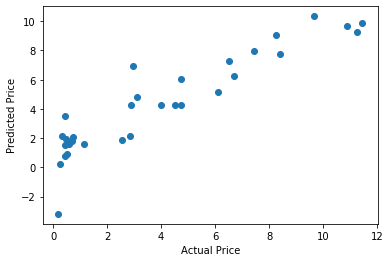

In [162]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

#### Lasso Regression Approach 

In [163]:
lasso_reg_model = Lasso()

In [164]:
lasso_reg_model.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [165]:
training_data_prediction = lasso_reg_model.predict(X_train)

In [166]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
error_score

0.8427856123435794

##### Plotting Training data for lasso model 

Text(0, 0.5, 'Predicted Price')

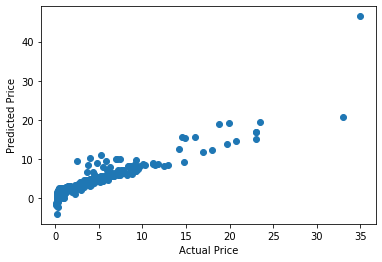

In [167]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [168]:
test_data_prediction = lasso_reg_model.predict(X_test)

In [170]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
error_score

0.8709167941173195

##### Plotting test data for  lasso regression predction model 

Text(0, 0.5, 'Predicted Price')

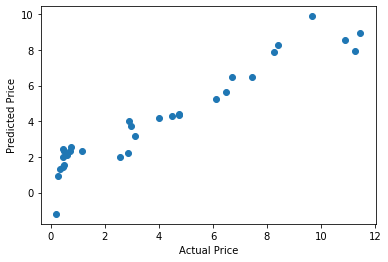

In [171]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> After some investigation of the categorical features we found out that 2015 and 2016 are the years that most of the car versions belong
> Petrol manual cars are the dominant cars in this dataset ollowed by diesel and CNG and automatic cars
> Dealer selling type more than indvidual selling type in the dataset 
> present and selling price are having a positive strong relationship 
> After combibibg features togethet we found out that automatic diesel cars are more expensive than manual petrol or CNG cars.
> The lower the kilometers driven by the car the higher selling price range.
> Fortuner and Innova cars are the highest price exist in the dataset.

